In [3]:
import numpy as np
import matplotlib.pyplot as plt

omega_init = []
theta_init = []
x = []

for i in range (0,22):
    omega_init.append(i*0.05)
omega = np.array(omega_init)
print omega

for i in range (0,19):
    theta_init.append(i*20)
theta = np.array(omega_init)

print omega
#assume sin(theta) = 1
for i in range(len(omega)):
    for j in range(len(theta)):
        xval = (3/(omega[i]*np.sin(theta[j]))*np.cos((np.pi + np.arccos(omega[i]*np.sin(theta[j])))/3))
        x.append(xval)
x_final = np.array(x)
"""
fig,rot = plt.subplots()
rot.plot(omega,x_final)
plt.show()"""

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05]


C:\Users\AlexLW\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


'\nfig,rot = plt.subplots()\nrot.plot(omega,x_final)\nplt.show()'

In [8]:
# black body filter visualisation

# first, define universal constants (in cgs units)
kB = 1.3806e-16 # Boltzmann's constant
h = 6.626e-27 # Planck's constant
c = 2.998e+10 # light speed

# next, define BB (Planck) function per unit wavelength
def black_body_lambda(L,T):
    frac_term = 1.0/(np.exp((h*c/(L*kB*T))) - 1.0)
    B_L = ((2.0*h*(c**2)*frac_term)/(L**5))
    return B_L

# define BB (Planck) function per unit frequency
def black_body_freq(nu,T):
    frac_term = 1.0/(np.exp((h*nu/(kB*T))) - 1.0)
    B_nu = ((2.0*h*(nu**3)*frac_term)/(c**2))
    return B_nu

# avoid NaN occurances due to 0/0
def avoid_nan(numer,denom):
    if (numer == 0.0 and denom == 0.0):
        y = 0.0
    else:
        y = numer,denom
    return y
    
# wavelength array, in cm
L = []
for i in range(1,101): # wavelength range: 200-1000 nm = (3-10) x 10^(-5) cm
    L.append(i*(1.0e-6))
L = np.array(L)
print 'Number of points per blackbody curve (wavelength values): '
print L.shape
print L
# effective temperature values
Teff_vals = [3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0, 7250.0, 7500.0, 7750.0, 8000.0, 8250.0, 8500.0, 8750.0, 9000.0, 9250.0, 9500.0, 9750.0, 10000.0, 10250.0, 10500.0, 10750.0, 11000.0, 11250.0, 11500.0, 11750.0, 12000.0, 12250.0, 12500.0, 12750.0, 13000.0, 14000.0, 15000.0, 16000.0, 17000.0, 18000.0, 19000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 25000.0, 26000.0, 27000.0, 28000.0, 29000.0, 30000.0, 31000.0, 32000.0, 33000.0, 34000.0, 35000.0, 36000.0, 37000.0, 38000.0, 39000.0, 40000.0, 41000.0, 42000.0, 43000.0, 44000.0, 45000.0, 46000.0, 47000.0, 48000.0, 49000.0, 50000.0]
Teff_vals = np.array(Teff_vals)
Teff_vals_red = [3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0]
print 'Number of blackbody curves: '
print len(Teff_vals)

B_lam_arr = []
for i in range(len(Teff_vals_red)):
    row_arr = []
    Teff = Teff_vals_red[i]
    # blackbody calculation for 'Teff'
    B_lam_i = black_body_lambda(L,Teff)
    #row_arr.append(Teff)
    #row_arr.append(B_lam_i)
    #if (i == 0):
        #print 'Teff, B_lam_i = ', Teff, B_lam_i
    B_lam_arr.append(B_lam_i)
    
B_lam = np.array(B_lam_arr)
print 'Blackbody plot y-values: '
print B_lam.shape
print 'First curve: Teff = ', Teff_vals[0]
print B_lam[0].shape
print B_lam[0]

# get data for curve of maxima
max_list = []
#L_Tmax_list = []
print 'column shape: '
print B_lam[:,i].shape
for i in range(len(Teff_vals_red)):
    Bmax = np.argmax(B_lam[:,i])
    temp_list = [L[Bmax],max(B_lam[:,i])]
    max_list.append(temp_list)
    if (i == 10):
        print Bmax, temp_list
        print len(temp_list)
        print B_lam[:,i]
    #L_Tmax_list.append(L[Bmax])

max_array = np.array(max_list)
print 'Array of curve maxima'
print max_array.shape
print max_array
#print B_lam[0,:]
#for 
#bb.plot(L[Bmax],max(B_lam[n*i]))

Number of points per blackbody curve (wavelength values): 
(100L,)
[  1.00000000e-06   2.00000000e-06   3.00000000e-06   4.00000000e-06
   5.00000000e-06   6.00000000e-06   7.00000000e-06   8.00000000e-06
   9.00000000e-06   1.00000000e-05   1.10000000e-05   1.20000000e-05
   1.30000000e-05   1.40000000e-05   1.50000000e-05   1.60000000e-05
   1.70000000e-05   1.80000000e-05   1.90000000e-05   2.00000000e-05
   2.10000000e-05   2.20000000e-05   2.30000000e-05   2.40000000e-05
   2.50000000e-05   2.60000000e-05   2.70000000e-05   2.80000000e-05
   2.90000000e-05   3.00000000e-05   3.10000000e-05   3.20000000e-05
   3.30000000e-05   3.40000000e-05   3.50000000e-05   3.60000000e-05
   3.70000000e-05   3.80000000e-05   3.90000000e-05   4.00000000e-05
   4.10000000e-05   4.20000000e-05   4.30000000e-05   4.40000000e-05
   4.50000000e-05   4.60000000e-05   4.70000000e-05   4.80000000e-05
   4.90000000e-05   5.00000000e-05   5.10000000e-05   5.20000000e-05
   5.30000000e-05   5.40000000e-05  

C:\Users\AlexLW\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


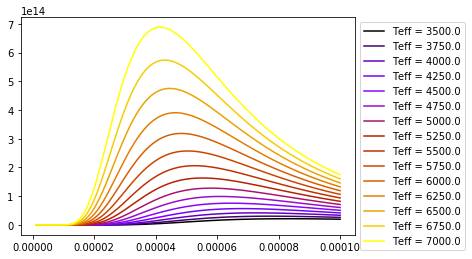

In [9]:
# plots
n = 1

fig,bb = plt.subplots()
col_map = plt.cm.gnuplot
plt.gca().set_color_cycle([col_map(i) for i in np.linspace(0, n, len(Teff_vals_red))])
for i in range(len(Teff_vals_red)/n):
    
    #if (i == 0 or i ==((len(Teff_vals_red)/n)-1)):
    bb.plot(L,B_lam[n*i,:],label = ('Teff = ' + str(Teff_vals_red[n*i])))
        
    #else:
        #bb.plot(L,B_lam[n*i,:])
    
#bb.set_ylim(0,2e+16)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()